In [2]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube as sc
import aplpy
import astropy.units as u
from jupyter_io import savefig_in_notebook

In [3]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]

In [5]:
data, header = hdu.data , hdu.header

In [7]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  143                                                  
NAXIS2  =                  144                                                  
NAXIS3  =                  101                                                  
HISTORY This FITS file uses the old GLS convention                              
HISTORY See AIPS Memo 46 for details                                            
VOBS    =                -45.0 / km/sec                                         
OBJECT  = 'W3_field'  /                                                         
BUNIT   = 'K       '           / Main Beam Temperature                          
DATAMIN =   -3.06100702286E+00  /                                               
DATAMAX =    5.35642585754E+

In [8]:
cube = sc.read(hdu)

In [9]:
subcube = cube.spectral_slab(-55*u.km/u.s, -40*u.km/u.s)
subcube = subcube.with_spectral_unit(u.km/u.s)

In [10]:
mom0 = subcube.moment(order=0)
mom1 = subcube.moment(order=1)
mom2 = subcube.moment(order=2)

In [12]:
hdu_mom1 = mom1.hdu
hdu_mom2 = mom2.hdu

In [29]:
np.median(hdu_mom1.data)

-43.17634155277345

In [30]:
np.mean(hdu_mom1.data)

-43.390455046774186

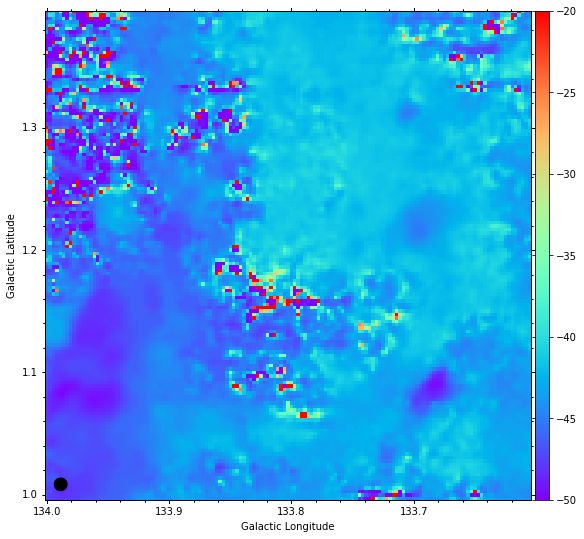

In [31]:
f = aplpy.FITSFigure(hdu_mom1)
f.show_colorscale(vmax = -20 , vmin = -50 ,cmap='rainbow')

f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')

# カラーバー
f.add_colorbar()

#contour
#f.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')

#スケールバー
#f.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f.add_beam()
f.beam.set_color('black')

INFO: Auto-setting vmax to  5.332e+01 [aplpy.core]


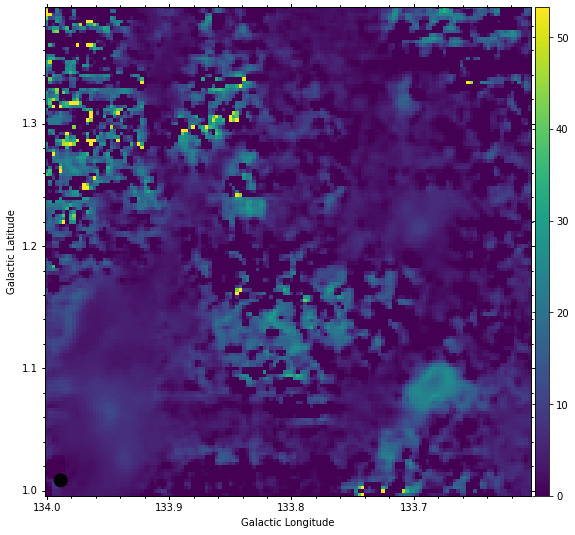

In [33]:
f = aplpy.FITSFigure(hdu_mom2)
f.show_colorscale(vmin = 0)

f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')

# カラーバー
f.add_colorbar()

#contour
#f.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')

#スケールバー
#f.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f.add_beam()
f.beam.set_color('black')